/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.17.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Duration of the audio sample [sec]:
30.0


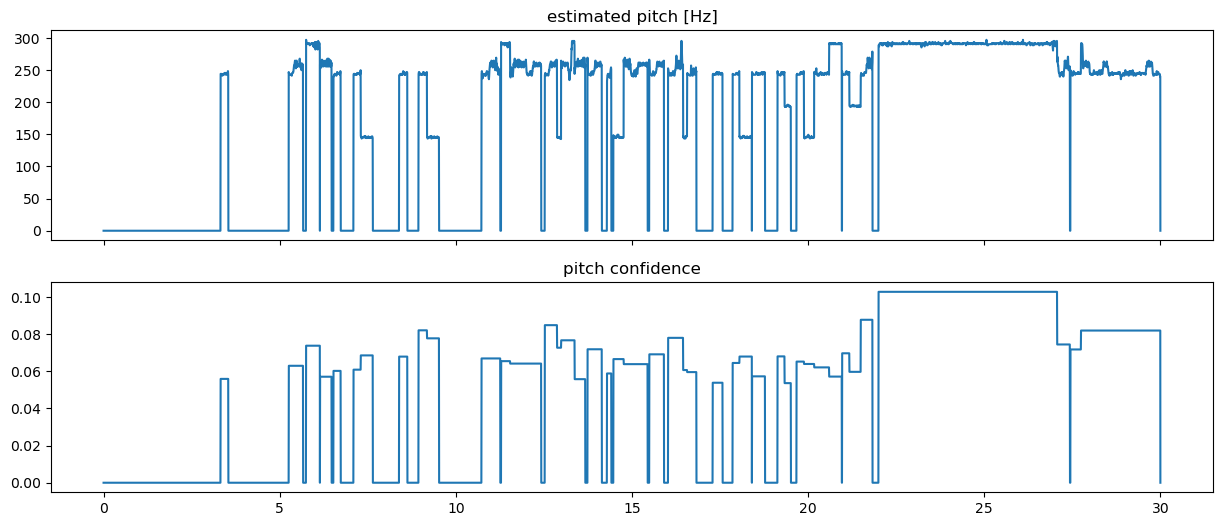

In [1]:
from PianoCrafter import PianoCrafter

pc = PianoCrafter('/data/laluna.mp3')
pc.extract_pitch()
pc.plot_descriptors()

In [5]:
from tempfile import TemporaryDirectory
import essentia.standard as es
from IPython.display import Audio, display

temp_dir = TemporaryDirectory()
# Essentia operates with float32 ndarrays instead of float64, so let's cast it.
synthesized_melody = pc.synth_melody()
es.AudioWriter(filename=temp_dir.name + 'tmp.mp3', format='mp3')(es.StereoMuxer()(pc.audio, synthesized_melody))

audio_in = Audio(pc.audiopath)
audio_out = Audio(temp_dir.name + 'tmp.mp3')

display(audio_in, audio_out)

[mp3 @ 0x8998f00] Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.
[AVIOContext @ 0x2be20c0] Statistics: 2 seeks, 4 writeouts
